In [1]:
from __future__ import print_function, division

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [12]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter


0.000507304434905


In [10]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


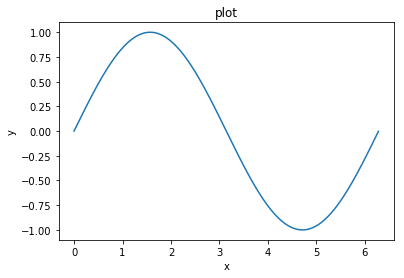

In [14]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
xarr = np.arange(0, 2*np.pi , 0.01)
yarr = np.sin(xarr)
plot_fn(xarr, yarr, 'plot')

In [29]:
# TODO then integrate y 
x = np.arange(0, 2*np.pi , 0.01)
y = np.sin(x)
integrate(y, 0.01)


-1.0853464615831085e-05

In [36]:
# TODO now use a np function to integrate y and compare
x = np.arange(0, 2*np.pi , 0.01)
y = np.sin(x)
print np.trapz(y, x)

5.07304434882e-06


In [37]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
x = np.arange(0, 6*np.pi , 0.01)
y = np.sin(x)
diffy = np.diff(y)
diffx = np.diff(x)
slopes = []
signs = []

for i in range(len(diffy)):
    slopes.append(diffy[i]/diffx[i])
for i in range(len(slopes)):
    signs.append(np.sign(slopes[i]))
    
for i in range(0, len(signs)-1):
        if signs[i] == -1.0 and signs[i+1] == 1.0:
            print 'the point', (x[i+1], y[i+1]), 'is a local minima'
        elif signs[i] == 1.0 and signs[i+1] == -1.0:
            print 'the point', (x[i+1], y[i+1]), 'is a local maxima'

the point (1.5700000000000001, 0.99999968293183461) is a local maxima
the point (4.71, -0.99999714638771797) is a local minima
the point (7.8500000000000005, 0.99999207330591877) is a local maxima
the point (11.0, -0.99999020655070348) is a local minima
the point (14.140000000000001, 0.99999598689147196) is a local maxima
the point (17.280000000000001, -0.99999923069749896) is a local minima


# Part 2

In [7]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [6]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [8]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    # apply filter to y_fft = y_clean
    y_clean=y_fft*low_pass_filter 
    yy = np.fft.irfft(y_clean, y_values.size)
    return yy


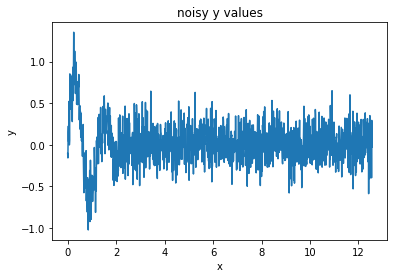

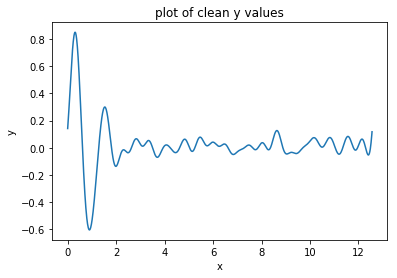

In [12]:
# TODO call noisy_packet() to get a Gaussian wave packet,
x = np.arange(0, 4*np.pi, 0.01)
noisy_y = noisy_packet(x, 5, 1, 0.2)
plot_fn(x, noisy_y, 'noisy y values')
# call clean_data() to apply a low pass filter to the data, and
yyy = clean_data(x, noisy_y)
# finally plot the result using plot_fn
plot_fn(x, yyy, 'plot of clean y values')

# Part 3

In [15]:
# TODO mask the arrays, then plot

In [16]:
# TODO try to generate masked noisy data and then clean it